# Feature importance

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel("data.xlsx")
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

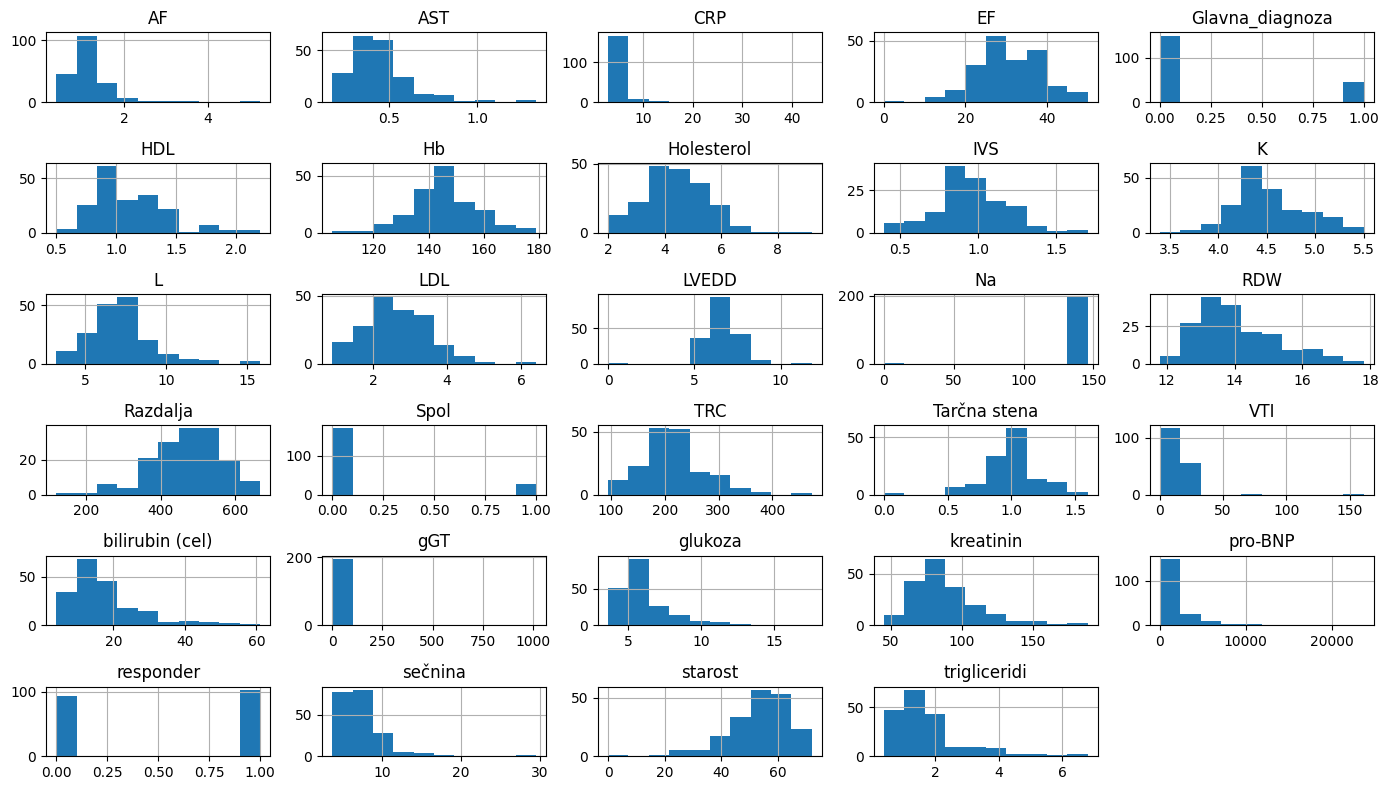

In [10]:
exclude = ['Unnamed: 0']
data.loc[:, data.columns.difference(exclude)].hist(figsize=(14,8))
plt.tight_layout()
plt.show()

In [11]:
X = data.drop("responder", axis=1)
y = data["responder"]

In [12]:
manjkajoce = X.isnull().sum()
meja = 0.2
for col in X.columns:
    if manjkajoce[col] > 0:
        # Imputiramo manjkajoče vrednosti
        if manjkajoce[col] < len(X)*meja:
            if X[col].dtype == 'float64':
                X[col].fillna(X[col].mean(), inplace=True)
            else:
                X[col].fillna(X[col].mode()[0], inplace=True)
        # ali pa stolpcec zavržemo
        else:
            X.drop(col, axis=1, inplace=True)

Text(0.5, 1.0, 'Mutual information between predictors and target')

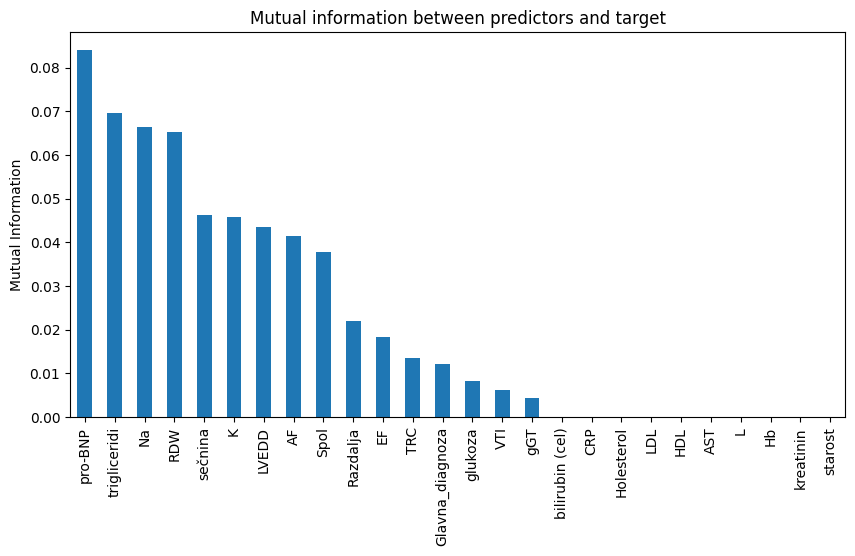

In [13]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

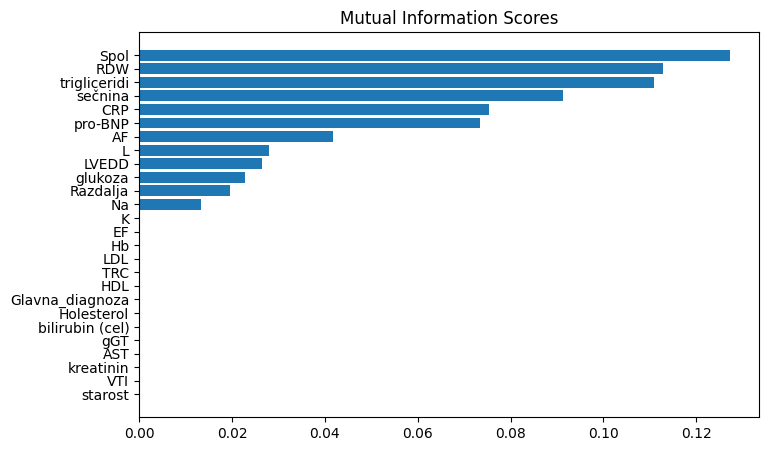

In [14]:
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Korelacijska matrika

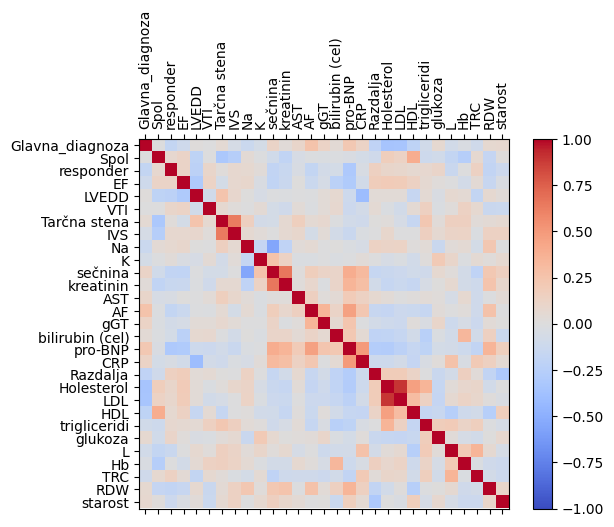

In [15]:
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

# Hi kvadrat

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Spol','Glavna_diagnoza', 'starost']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="responder" )  

Spol is NOT an important predictor. (Discard Spol from model)
Glavna_diagnoza is IMPORTANT for Prediction
starost is NOT an important predictor. (Discard starost from model)


In [17]:
data.dtypes

Glavna_diagnoza      int64
Spol                 int64
responder            int64
EF                   int64
LVEDD              float64
VTI                float64
Tarčna stena       float64
IVS                float64
Na                   int64
K                  float64
sečnina            float64
kreatinin            int64
AST                float64
AF                 float64
gGT                float64
bilirubin (cel)      int64
pro-BNP            float64
CRP                float64
Razdalja           float64
Holesterol         float64
LDL                float64
HDL                float64
trigliceridi       float64
glukoza            float64
L                  float64
Hb                 float64
TRC                float64
RDW                float64
starost              int64
dtype: object